In [2]:
!pip install corner
!pip install emcee

Defaulting to user installation because normal site-packages is not writeable
  Using cached corner-2.2.2-py3-none-any.whl (15 kB)
Defaulting to user installation because normal site-packages is not writeable


In [3]:
from astropy.table import QTable
import numpy as np
import matplotlib.pyplot as plt
#import Pymc3 as pm
import emcee
import corner

In [4]:
data = QTable.read('./eid1/eid1_0.csv', format = 'ascii.csv')
data

frequency,magnetic_field,rho,total_power,TE11_power
float64,float64,float64,float64,float64
18250388282.41455,1.5,0.003174308959632239,1.730592358404203e-13,4.778626266672517e-15
19016110588.609,1.5,0.001497378226406374,1.312043400277056e-13,6.815138569049045e-15
18691085963.12689,1.5,0.001853661096110662,1.493901330002656e-13,6.54725721742661e-15
18241666439.84137,1.5,0.002925370777539223,1.918128045520965e-13,5.182243566234435e-15
18622645529.34571,1.5,0.001675903160541347,1.40786356568587e-13,6.79587626729229e-15
18681076645.27095,1.5,0.001940616901373799,1.556278712203723e-13,6.440813627118227e-15
18663774385.47527,1.5,0.002367502000413435,1.543733372137705e-13,5.859651455650469e-15
18542300775.15652,1.5,0.002336811101068802,1.491313636557608e-13,5.956122507485726e-15
18790965944.99677,1.5,0.002810362427815703,1.638358722016309e-13,5.149213271059685e-15


In [8]:
def logPrior(theta):
    TE11, totalPower, Fc = theta
    if (0<inp1<constr1 and 0<inp2<constr2 and 0<inp3<constr3):
        return 0.0 
    else:
        return -np.inf

def logLikelihood(theta, data):
    inp1, inp2, inp3 = theta
    if (0<inp1<constr1 and 0<inp2<constr2 and 0<inp3<constr3):
        #MODEL FUNCTION: Function that calculates the theoretical values with inputs 1,2,and 3. Take TE11, TotalPower, and Fc and find Rho
        OBSERVED = data['rho']
        #ERROR Value: Calculate standard deviation of the error?
        #Return -(np.sum((OBSERVED-MODEL)/ERROR)**2) 
        return  #Return -χ^2 emcee takes exp(-χ^2)
    else:
        return -np.inf

def logPosterior(param, data):
    return logPrior(param) + logLikelihood(param, data)

In [11]:
ndim = 3#number of parameters in the model
nwalkers = 20 #Number of walkers
nburn = 1000 #Burnoff the first 1000 steps to let the chain stabilize
nsteps = 10000 #Steps the walkers will take in probspace
theta = [init1, init2, init3] #initial guesses for paramaters

initialize = np.array(theta + 0.01 * np.random.rand(nwalkers, ndim)) #creates some starting points with random displacement
sampler = emcee.EnsembleSampler(nwalkers, ndim, logPosterior, args=[data]) #create the sampler
sampler.run_mcmc(initialize, nSteps, progress=True) #run the sampler at starting position over nsteps displaying progress
print('Done :)')

NameError: name 'init1' is not defined

NameError: name 'sampler' is not defined

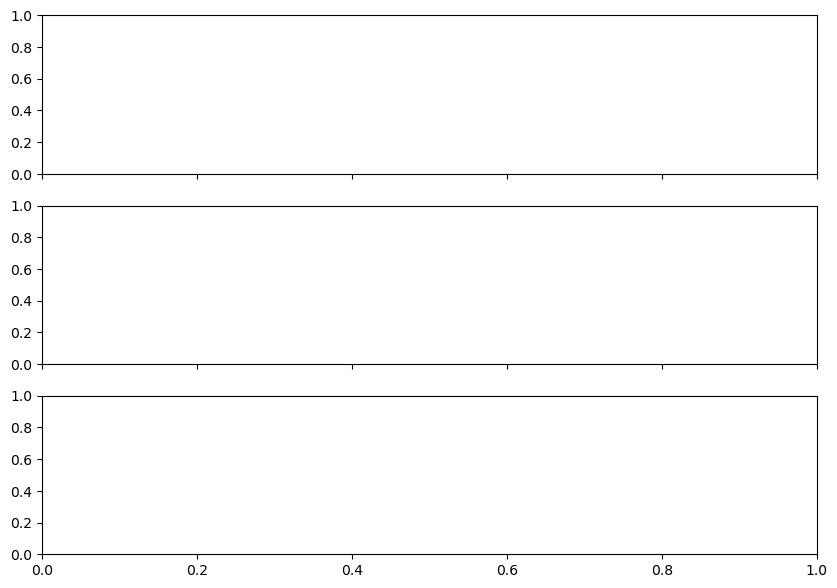

In [10]:
fig, axs = plt.subplots(3, figsize=(10,7), sharex = True)
samples = sampler.get_chain()
labels = ["param 1", "param 2", "param 3"]
for i in range(ndim):
    ax = axs[i]
    ax.plot(samples[:,:,i], "k", alpha = 0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)
    
axs[-1].set_xlabel('Step Number')